In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_frequency=pd.read_csv("frequency_domain_features_train.csv")
df_frequency.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [3]:
df_time=pd.read_csv("time_domain_features_train.csv")
df_time.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [4]:
df_heart_rate=pd.read_csv("heart_rate_non_linear_features_train.csv")
df_heart_rate.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [5]:
from functools import reduce
dfs = [df_frequency,df_time,df_heart_rate]
df_final = reduce(lambda left,right: pd.merge(left,right,on='uuid'),dfs)

In [6]:
df_final=df_final.drop(['uuid'],axis=1)
df_final=df_final.drop(['datasetId'],axis=1)

In [7]:
df_final.skew()

VLF                  1.960735
VLF_PCT             -0.410836
LF                   1.349076
LF_PCT               0.425164
LF_NU               -1.645603
HF                   2.476530
HF_PCT               2.021882
HF_NU                1.645603
TP                   1.452435
LF_HF                9.781091
HF_LF                2.159372
MEAN_RR              0.648000
MEDIAN_RR            0.925513
SDRR                 2.363789
RMSSD                0.399529
SDSD                 0.399668
SDRR_RMSSD           3.707939
HR                   0.411721
pNN25                1.203114
pNN50                1.264137
KURT                 5.722209
SKEW                 1.223005
MEAN_REL_RR          0.112796
MEDIAN_REL_RR       -0.948009
SDRR_REL_RR          0.869543
RMSSD_REL_RR         1.258784
SDSD_REL_RR          1.258784
SDRR_RMSSD_REL_RR    0.838587
KURT_REL_RR          5.722209
SKEW_REL_RR          1.223005
SD1                  0.399668
SD2                  2.363386
sampen              -3.091012
higuci    

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VLF                369289 non-null  float64
 1   VLF_PCT            369289 non-null  float64
 2   LF                 369289 non-null  float64
 3   LF_PCT             369289 non-null  float64
 4   LF_NU              369289 non-null  float64
 5   HF                 369289 non-null  float64
 6   HF_PCT             369289 non-null  float64
 7   HF_NU              369289 non-null  float64
 8   TP                 369289 non-null  float64
 9   LF_HF              369289 non-null  float64
 10  HF_LF              369289 non-null  float64
 11  MEAN_RR            369289 non-null  float64
 12  MEDIAN_RR          369289 non-null  float64
 13  SDRR               369289 non-null  float64
 14  RMSSD              369289 non-null  float64
 15  SDSD               369289 non-null  float64
 16  SD

In [9]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
VLF,369289.0,2199.580170,1815.773422,159.480176,1001.189280,1.667903e+03,2654.121052,12617.977191
VLF_PCT,369289.0,64.289242,16.774844,19.031219,52.909877,6.635024e+01,76.825032,97.738848
LF,369289.0,946.530252,574.171780,90.048557,545.449386,7.827163e+02,1201.432256,3291.548112
LF_PCT,369289.0,34.095182,16.040290,2.165119,22.305936,3.204703e+01,44.647115,77.928847
LF_NU,369289.0,95.566718,4.123365,69.879083,93.645734,9.664314e+01,98.771946,99.987175
HF,369289.0,39.245603,45.398869,0.061783,10.720312,2.484194e+01,45.272368,364.486936
HF_PCT,369289.0,1.615576,1.761073,0.002150,0.346803,1.039513e+00,2.245115,13.095664
HF_NU,369289.0,4.433282,4.123365,0.012825,1.228054,3.356860e+00,6.354266,30.120917
TP,369289.0,3185.356025,1923.227187,377.692795,1828.147788,2.796857e+03,4052.260157,13390.684098
LF_HF,369289.0,115.977200,360.855129,2.319952,14.737458,2.878975e+01,80.429614,7796.443096


In [10]:
df_corr=df_final.corr().abs()

In [11]:
df_corr

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci
VLF,1.000000,0.676628,0.026521,0.664830,0.105044,0.010441,0.389684,0.105044,0.951800,0.126668,...,0.242427,0.087994,0.087993,0.303226,0.050392,0.236819,0.341293,0.798240,0.290457,0.570043
VLF_PCT,0.676628,1.000000,0.541976,0.995240,0.046868,0.283068,0.460465,0.046868,0.470337,0.103768,...,0.343214,0.333824,0.333824,0.277593,0.090900,0.228209,0.278996,0.581071,0.396915,0.551476
LF,0.026521,0.541976,1.000000,0.570404,0.247482,0.315662,0.032871,0.247482,0.331037,0.099452,...,0.783464,0.524338,0.524337,0.077445,0.144318,0.075650,0.887012,0.020562,0.222920,0.035736
LF_PCT,0.664830,0.995240,0.570404,1.000000,0.043265,0.216789,0.371761,0.043265,0.452276,0.082040,...,0.327483,0.288087,0.288087,0.215372,0.106355,0.238718,0.299684,0.576758,0.415872,0.496831
LF_NU,0.105044,0.046868,0.247482,0.043265,1.000000,0.749237,0.840496,1.000000,0.155373,0.281325,...,0.247067,0.582438,0.582438,0.760120,0.216003,0.205864,0.185263,0.002995,0.304454,0.577690
HF,0.010441,0.283068,0.315662,0.216789,0.749237,1.000000,0.721758,0.749237,0.107987,0.220058,...,0.732687,0.883734,0.883735,0.581391,0.085113,0.184903,0.332324,0.048295,0.171254,0.434092
HF_PCT,0.389684,0.460465,0.032871,0.371761,0.840496,0.721758,1.000000,0.840496,0.360688,0.241191,...,0.286441,0.555832,0.555832,0.682511,0.102859,0.000527,0.072056,0.281651,0.007106,0.727750
HF_NU,0.105044,0.046868,0.247482,0.043265,1.000000,0.749237,0.840496,1.000000,0.155373,0.281325,...,0.247067,0.582438,0.582438,0.760120,0.216003,0.205864,0.185263,0.002995,0.304454,0.577690
TP,0.951800,0.470337,0.331037,0.452276,0.155373,0.107987,0.360688,0.155373,1.000000,0.144087,...,0.480078,0.260477,0.260477,0.295681,0.088653,0.205367,0.594883,0.748643,0.211720,0.517278
LF_HF,0.126668,0.103768,0.099452,0.082040,0.281325,0.220058,0.241191,0.281325,0.144087,1.000000,...,0.069479,0.204986,0.204986,0.428285,0.074650,0.080524,0.170234,0.016344,0.108667,0.244251


In [12]:
c=df_corr.unstack()
co=c.sort_values(kind='quicksort')
co_df=pd.DataFrame(co)
co_df.columns=['corr']

In [13]:
co_df.reset_index(level=[0,1],inplace=True)
co_df.columns
co_df.rename(columns={'level_0':'feature1','level_1':'feature2'},inplace=True)
co_df

,feature1,feature2,corr
0,HF_LF,SDRR,0.000024
1,SDRR,HF_LF,0.000024
2,SD2,MEAN_REL_RR,0.000212
3,MEAN_REL_RR,SD2,0.000212
4,SDRR,MEAN_REL_RR,0.000217
...,...,...,...
1151,pNN50,pNN50,1.000000
1152,SDRR_REL_RR,SDRR_REL_RR,1.000000
1153,higuci,higuci,1.000000
1154,HF_NU,LF_NU,1.000000


In [14]:
co_df_hr= co_df[co_df['feature1']=='HR'] # correlation with HR

In [15]:
co_df_hr.sort_values(by='corr',ascending=False)

,feature1,feature2,corr
1143,HR,HR,1.000000
1088,HR,MEAN_RR,0.944552
1086,HR,MEDIAN_RR,0.929640
1015,HR,LF_NU,0.724268
1012,HR,HF_NU,0.724268
1006,HR,HF_LF,0.701864
997,HR,SDRR_RMSSD_REL_RR,0.675554
991,HR,HF_PCT,0.656421
987,HR,HF,0.647427
860,HR,SDSD_REL_RR,0.499867


In [16]:
# Selecting features whose correlation value is less than 0.4 with HR
remove_features_hr=co_df_hr.loc[co_df['corr']<=0.4]
remove_features_hr.reset_index(inplace=True)
remove_features_hr

,index,feature1,feature2,corr
0,71,HR,MEAN_REL_RR,0.017776
1,192,HR,MEDIAN_REL_RR,0.054649
2,256,HR,SDRR_RMSSD,0.084332
3,294,HR,LF,0.097228
4,330,HR,pNN50,0.114896
5,465,HR,LF_PCT,0.194131
6,486,HR,SD2,0.202003
7,488,HR,SDRR,0.202327
8,545,HR,SDRR_REL_RR,0.234557
9,582,HR,VLF_PCT,0.254543


In [17]:
remove_list_hr=remove_features_hr['feature2'].to_list()
remove_list_hr=list(set(remove_list_hr))
remove_list_hr

['KURT',
 'SD2',
 'pNN25',
 'TP',
 'SDRR',
 'SDRR_RMSSD',
 'SKEW',
 'sampen',
 'pNN50',
 'MEAN_REL_RR',
 'LF',
 'SKEW_REL_RR',
 'MEDIAN_REL_RR',
 'VLF',
 'SDRR_REL_RR',
 'LF_PCT',
 'KURT_REL_RR',
 'RMSSD',
 'SD1',
 'SDSD',
 'VLF_PCT']

In [18]:

## excluding the Target Variable
#remove_list.remove('HR')
len(remove_list_hr)

21

In [19]:
# removing the feaures whose correlation value is less than 0.4 with HR
df_final=df_final.drop(remove_list_hr,axis=1)

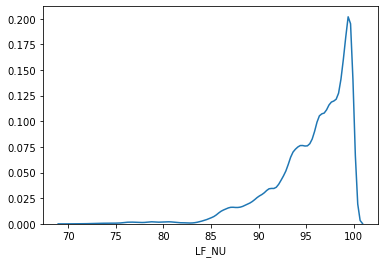

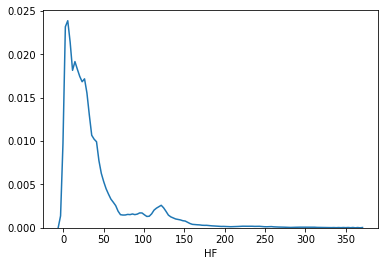

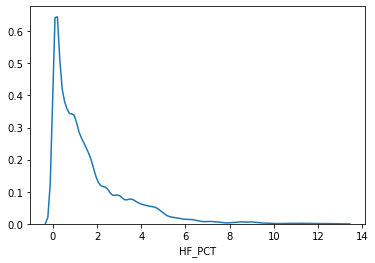

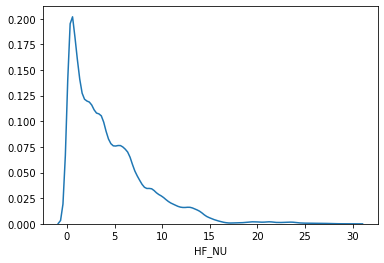

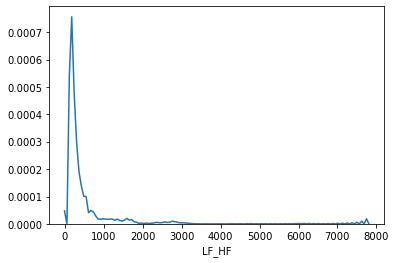

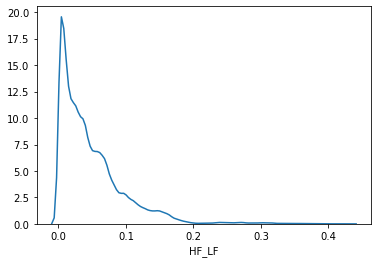

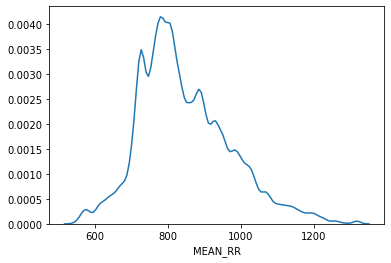

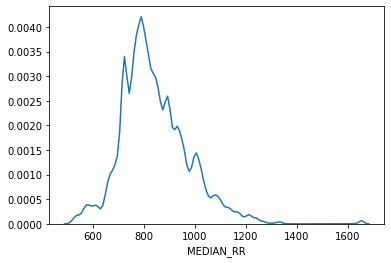

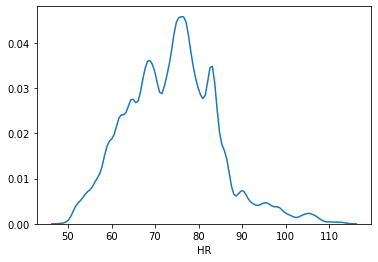

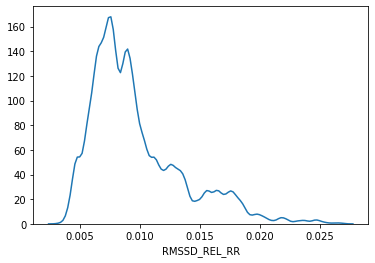

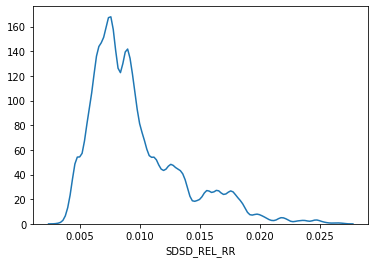

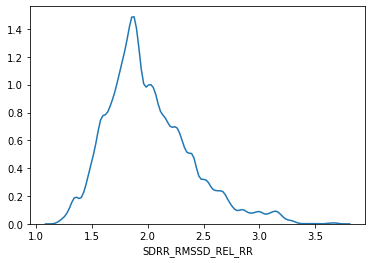

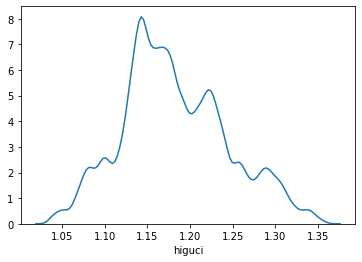

In [20]:
## Population distplots
num_features=df_final.drop('condition',axis=1)
for i in num_features.columns:
    sns.distplot(num_features[i],hist=False)
    plt.show()

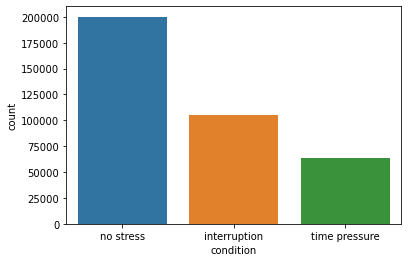

In [21]:
sns.countplot(df_final['condition'])

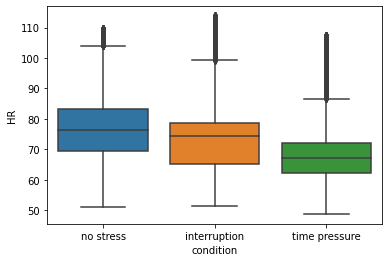

In [23]:
sns.boxplot(y='HR',x='condition',data=df_final)

In [24]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder= LabelEncoder()  
df_final['condition'] = labelencoder.fit_transform(df_final['condition'])

df_final['condition'] = df_final['condition'].astype('float64')
df_final.dtypes

LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
LF_HF                float64
HF_LF                float64
MEAN_RR              float64
MEDIAN_RR            float64
HR                   float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
higuci               float64
condition            float64
dtype: object

In [51]:
# Separating dependent and independent variables
X = df_final.drop('HR',axis=1)
Y = df_final['HR']

In [52]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.3, random_state=1)

In [27]:
from sklearn.model_selection import cross_val_score, KFold
k = KFold(random_state=7, n_splits=5, shuffle=True)

# KFold will split the data in 5 equal parts

In [53]:
algo= []
Accuracy = []
mae = []
# Blanks list to store model name, cross validated r2 score mean and MAE

In [54]:

# Linear Regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([('scaler', StandardScaler()),('reg', LinearRegression())])

pipeline.fit(X_train, Y_train)


# Make predictions using the testing set
Y_predict= pipeline.predict(X_test)


# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))

print('Test Accuracy: %.3f' % pipeline.score(X_test, Y_test))
algo.append('Linear Regression')
Accuracy.append(pipeline.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))



Mean squared error: 1.36
Test Accuracy: 0.955


In [59]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)

model.fit(X_train, Y_train)

Y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, Y_test))


algo.append('Random Forest')
Accuracy.append(model.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))
#cv_rmse_mean.append((-cross_val_score(model, X, Y, cv=k, scoring='neg_mean_absolute_error').mean())**0.5)

Mean squared error: 0.01
Model Score: 1.000


In [62]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
df

,Actual,Predicted
47340,67.923866,67.914049
93858,76.960355,76.958346
201163,76.086628,76.081127
364634,74.739285,74.756604
54177,92.082130,92.077557
...,...,...
351592,74.733127,74.727737
178245,112.052010,112.066075
149430,71.297707,71.296969
311317,96.778190,96.804434


In [55]:

# Bagging

from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(random_state=7)

model.fit(X_train, Y_train)

Y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, Y_test))


algo.append('Bagging')
#cv_r2_mean.append(cross_val_score(model, X, Y, cv=k).mean())
Accuracy.append(model.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))
#cv_rmse_mean.append((-cross_val_score(model, X, Y, cv=k, scoring='neg_mean_squared_error').mean())**0.5);


Mean squared error: 0.02
Model Score: 1.000


In [56]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=7)

model.fit(X_train, Y_train)

Y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, Y_test))
algo.append('AdaBoost')
#cv_r2_mean.append(cross_val_score(model, X, Y, cv=k).mean())
Accuracy.append(model.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))
#cv_rmse_mean.append((-cross_val_score(model, X, Y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

Mean squared error: 1.55
Model Score: 0.970


In [57]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=7)

model.fit(X_train, Y_train)
Y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, Y_test))

algo.append('Gradient Boosting')
#cv_r2_mean.append(cross_val_score(model, X, Y, cv=k).mean())
Accuracy.append(model.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))
#cv_mae_mean.append((-cross_val_score(model, X, Y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

Mean squared error: 0.49
Model Score: 0.995


In [60]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['Accuracy'] = Accuracy
results['MAE'] = mae
results = results.set_index('Model')
results

,Accuracy,MAE
Model,,
Linear Regression,0.955043,1.355108
Bagging,0.999968,0.015093
AdaBoost,0.969568,1.550145
Gradient Boosting,0.995012,0.485628
Random Forest,0.999975,0.012242
